Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
from bs4 import BeautifulSoup

Import the dataset from Drive(Datasets are downloafded from the Kaggle)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab_projects/questions.csv')

Dataset Investigation

In [4]:
dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
dataset.shape

(404351, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
dataset.describe()

,id,qid1,qid2,is_duplicate
count,404351.000000,404351.000000,404351.000000,404351.000000
mean,202175.000000,391840.987691,390195.973765,0.369248
std,116726.223686,228430.857607,228803.645742,0.482602
min,0.000000,1.000000,2.000000,0.000000
25%,101087.500000,193381.000000,191012.000000,0.000000
50%,202175.000000,390630.000000,388364.000000,0.000000
75%,303262.500000,589514.000000,588071.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


Check for Duplicate Values

In [8]:
dataset.duplicated().sum()

0

Distribution of Duplicated and Non Duplicated Questions

<Axes: >

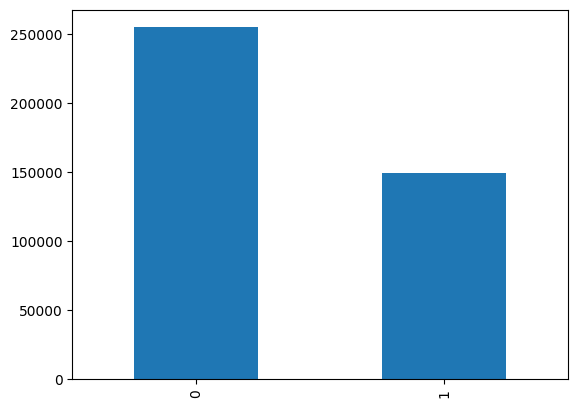

In [9]:
dataset['is_duplicate'].value_counts().plot(kind='bar')


In [10]:
dataset['is_duplicate'].value_counts()[1]/dataset['is_duplicate'].value_counts()[0]

0.5854104177694133

Ratio of Duplicate to Non Duplicate question is 0.58

Number of unique questions by comparing qid1 & qid2



In [11]:
qid=dataset['qid1']+dataset['qid2']
print('Number of unique question:',np.unique(qid).shape[0])

Number of unique question: 399931


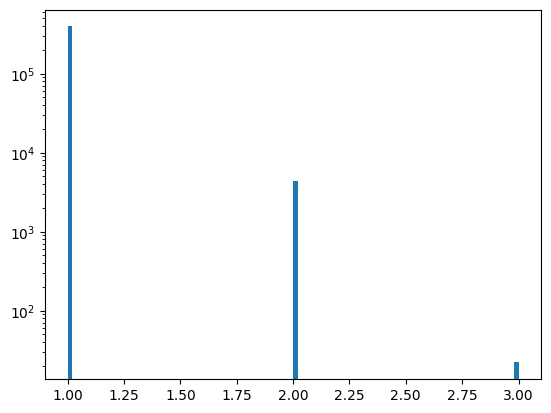

In [12]:
plt.hist(qid.value_counts().values,bins=100,label=str,)
plt.yscale('log')
plt.show()

**Conclusion**


1. Most number of questions are unique.
2. Some questions are repeated twice and thrice.



Its difficult to train large set of data, so we will perform modelling in small chunk of data.

In [13]:
small_dataset=dataset.sample(30000,random_state=2)

In [14]:
small_dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [15]:
small_dataset.shape

(30000, 6)

<Axes: >

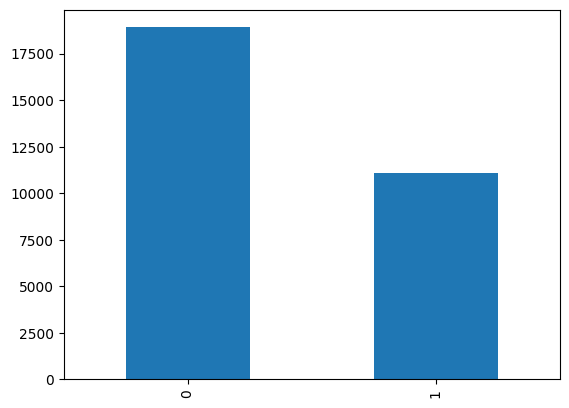

In [16]:
small_dataset['is_duplicate'].value_counts().plot(kind='bar')

In [17]:
small_dataset['is_duplicate'].value_counts()[1]/small_dataset['is_duplicate'].value_counts()[0]

0.5857913098636219

**Conclusion**
The ratio of duplicate to non duplicate questions in small_dataset is approximately same as original data.

In [18]:
small_qid=small_dataset['qid1']+small_dataset['qid2']
print('Number of unique question:',np.unique(small_qid).shape[0])

Number of unique question: 29971


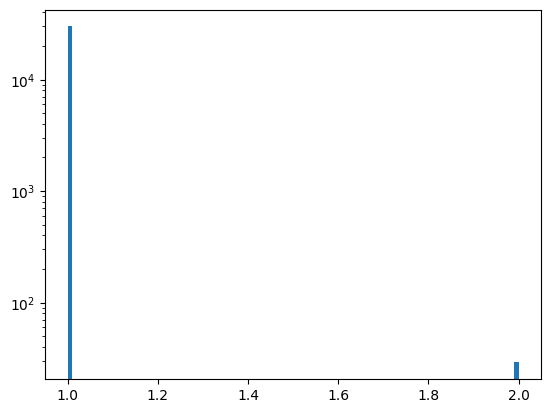

In [19]:
plt.hist(small_qid.value_counts().values,bins=100,label=str,)
plt.yscale('log')
plt.show()

***Feature Engineering***

---
Add question length




In [20]:
small_dataset['question1_len']=small_dataset['question1'].str.len()
small_dataset['question2_len']=small_dataset['question2'].str.len()
small_dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


Number of Words in each questions

In [21]:
small_dataset['question1_word_len']=small_dataset['question1'].apply(lambda x: len(x.split(" ")))
small_dataset['question2_word_len']=small_dataset['question2'].apply(lambda x: len(x.split(" ")))

In [22]:
small_dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


Number of common Words in question1 and Question2

In [23]:
def common_words(question):
    w1 = set(map(lambda word: word.lower().strip(), question['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), question['question2'].split(" ")))
    return len(w1 & w2)

small_dataset['word_common'] = small_dataset.apply(common_words, axis=1)
small_dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len,word_common
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3


Sum of Unique Words in each question

In [24]:
def total_words(question):
    w1 = set(map(lambda word: word.lower().strip(), question['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), question['question2'].split(" ")))
    return len(w1) + len(w2)

small_dataset['Total_unique_words'] = small_dataset.apply(total_words, axis=1)
small_dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len,word_common,Total_unique_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19


**Word Share :** Divide the common words by the total number of words.

In [25]:
small_dataset['word_share'] = round(small_dataset['word_common']/small_dataset['Total_unique_words'],2)
small_dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len,word_common,Total_unique_words,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,0.21
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,0.06
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,0.28
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,0.16


**Exploratory Data analysis of newly added features**

Distribution of length of question1

Minimum Characters 2
Maximum Characters 332
Average num of Characters 59


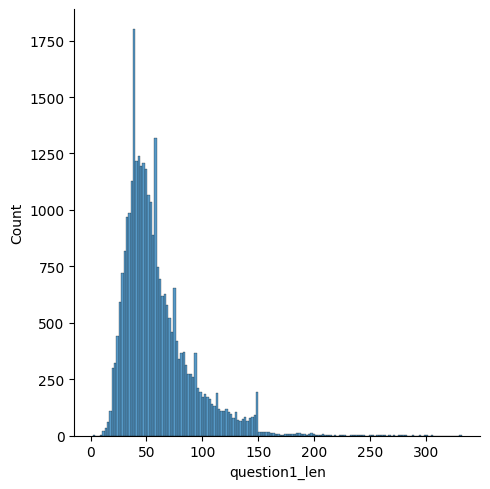

In [26]:
sns.displot(small_dataset['question1_len'])
print('Minimum Characters',small_dataset['question1_len'].min())
print('Maximum Characters',small_dataset['question1_len'].max())
print('Average num of Characters',int(small_dataset['question1_len'].mean()))

Distribution of length of question2


Minimum Characters 3
Maximum Characters 1151
Average num of Characters 59


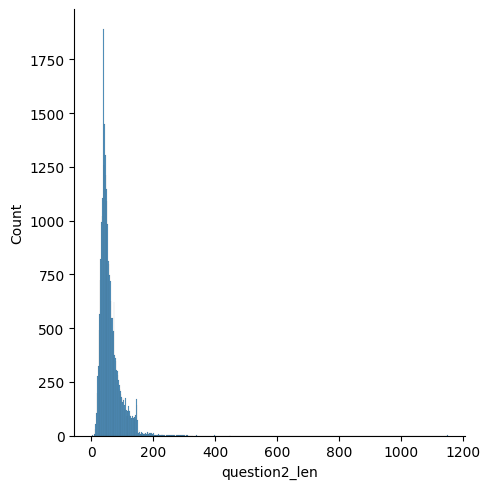

In [27]:
sns.displot(small_dataset['question2_len'])
print('Minimum Characters',small_dataset['question2_len'].min())
print('Maximum Characters',small_dataset['question2_len'].max())
print('Average num of Characters',int(small_dataset['question2_len'].mean()))

Distribution of questions in question1 based on number of words

Minimum Words 1
Maximum Words 63
Average num of Words 10


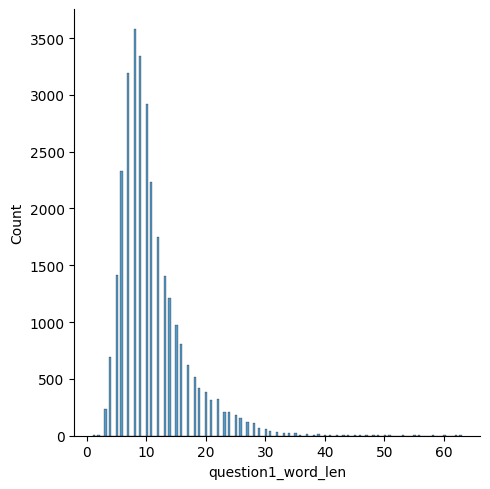

In [28]:
sns.displot(small_dataset['question1_word_len'])
print('Minimum Words',small_dataset['question1_word_len'].min())
print('Maximum Words',small_dataset['question1_word_len'].max())
print('Average num of Words',int(small_dataset['question1_word_len'].mean()))

Distribution of questions in question2 based on number of words

Minimum Words 1
Maximum Words 237
Average num of Words 11


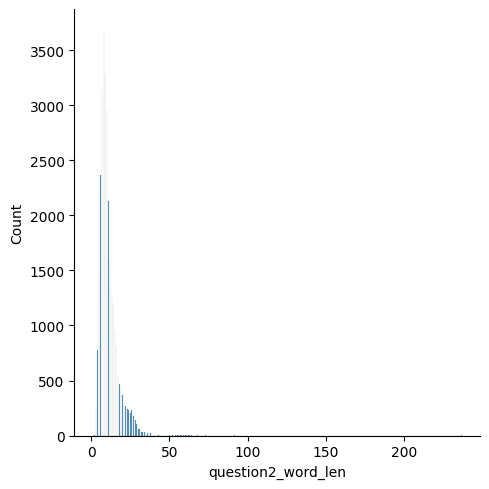

In [29]:
sns.displot(small_dataset['question2_word_len'])
print('Minimum Words',small_dataset['question2_word_len'].min())
print('Maximum Words',small_dataset['question2_word_len'].max())
print('Average num of Words',int(small_dataset['question2_word_len'].mean()))

Analysis of Common words in duplicated and non duplicated questions

In [30]:
print('Minimum number of common words in duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 1]['word_common'].min()))
print('Maximum number of common words in duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 1]['word_common'].max()))
print('Average number of common words in duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 1]['word_common'].mean()))
print('Minimum number of common words in non duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 0]['word_common'].min()))
print('Maximum number of common words in non duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 0]['word_common'].max()))
print('Average number of common words in non duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 0]['word_common'].mean()))

Minimum number of common words in duplicated questions :  1
Maximum number of common words in duplicated questions :  33
Average number of common words in duplicated questions :  5
Minimum number of common words in non duplicated questions :  0
Maximum number of common words in non duplicated questions :  30
Average number of common words in non duplicated questions :  3


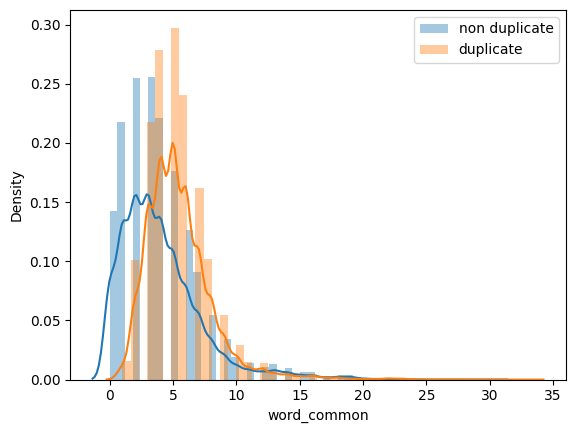

In [31]:
sns.distplot(small_dataset[small_dataset['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(small_dataset[small_dataset['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

**Conclusion**


In [32]:
print('Minimum of sum of unique common words in duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 1]['Total_unique_words'].min()))
print('Maximum of sum of unique common words in duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 1]['Total_unique_words'].max()))
print('Average of total unique common words in duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 1]['Total_unique_words'].mean()))
print('Minimum of sum of unique common words in non duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 0]['Total_unique_words'].min()))
print('Maximum of sum of unique common words in non duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 0]['Total_unique_words'].max()))
print('Average of total unique common words in non duplicated questions : ',int(small_dataset[small_dataset['is_duplicate'] == 0]['Total_unique_words'].mean()))

Minimum of sum of unique common words in duplicated questions :  5
Maximum of sum of unique common words in duplicated questions :  68
Average of total unique common words in duplicated questions :  19
Minimum of sum of unique common words in non duplicated questions :  6
Maximum of sum of unique common words in non duplicated questions :  148
Average of total unique common words in non duplicated questions :  22


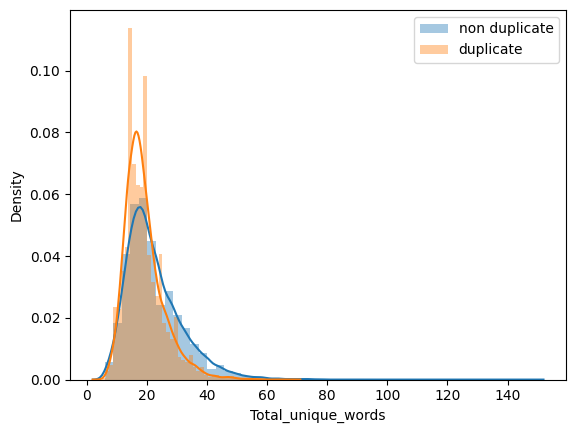

In [33]:
sns.distplot(small_dataset[small_dataset['is_duplicate'] == 0]['Total_unique_words'],label='non duplicate')
sns.distplot(small_dataset[small_dataset['is_duplicate'] == 1]['Total_unique_words'],label='duplicate')
plt.legend()
plt.show()

Common Word Share Analysis


In [34]:
print('Minimum share of common words in duplicated questions : ',round(small_dataset[small_dataset['is_duplicate'] == 1]['word_share'].min(),3))
print('Maximum share of  common words in duplicated questions : ',round(small_dataset[small_dataset['is_duplicate'] == 1]['word_share'].max(),3))
print('Average share of common words in duplicated questions : ',round(small_dataset[small_dataset['is_duplicate'] == 1]['word_share'].mean(),3))
print('Minimum share of common words in non duplicated questions : ',round(small_dataset[small_dataset['is_duplicate'] == 0]['word_share'].min(),3))
print('Maximum share of common words in non duplicated questions : ',round(small_dataset[small_dataset['is_duplicate'] == 0]['word_share'].max(),3))
print('Average share of common words in non duplicated questions : ',round(small_dataset[small_dataset['is_duplicate'] == 0]['word_share'].mean(),3))

Minimum share of common words in duplicated questions :  0.06
Maximum share of  common words in duplicated questions :  0.5
Average share of common words in duplicated questions :  0.289
Minimum share of common words in non duplicated questions :  0.0
Maximum share of common words in non duplicated questions :  0.5
Average share of common words in non duplicated questions :  0.186


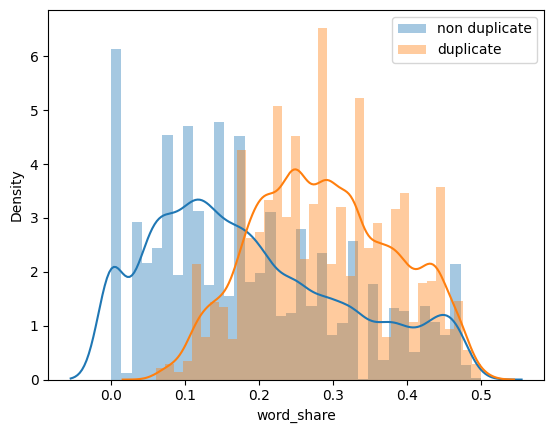

In [35]:
sns.distplot(small_dataset[small_dataset['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(small_dataset[small_dataset['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

**Machine Learning Model Creation**

Separate the question column and vectorise them.

In [36]:
question_dataset=small_dataset[['question1','question2']]
question_dataset.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


Number Columns

In [37]:
new_feature_dataset=small_dataset.drop(columns=['id','qid1','qid2','question1','question2'])
new_feature_dataset.head()

,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len,word_common,Total_unique_words,word_share
339499,1,58,42,11,8,4,19,0.21
289521,0,52,105,11,22,2,32,0.06
4665,0,125,124,24,24,20,42,0.48
54203,1,45,60,8,10,5,18,0.28
132566,0,54,39,11,8,3,19,0.16


In [38]:
new_feature_dataset.shape

(30000, 8)

**Vectorizing Features**


In [39]:
question_list=list(question_dataset['question1'])+list(question_dataset['question2'])

# Apply Bag of Word Model
cv=CountVectorizer(max_features = 3000)
cv_fit=cv.fit_transform(question_list)
#print(cv_fit.shape)

q1_arr, q2_arr = np.vsplit(cv.fit_transform(question_list).toarray(),2)
#print(q1_arr.shape)
#Create dataFrame for both the questions Feature
temp_df1 = pd.DataFrame(q1_arr, index= question_dataset.index)
temp_df2 = pd.DataFrame(q2_arr, index= question_dataset.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
print(temp_df.shape)

#Concat vectorize dataframe with our newly added feature Df
final_df = pd.concat([new_feature_dataset, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6000)
(30000, 6008)


,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len,word_common,Total_unique_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


**Train Test Split**


In [40]:
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values,test_size=0.2,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 6007)
(24000,)
(6000, 6007)
(6000,)


**Train Machine Learning Model**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7645

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7691666666666667

**Text Pre processing and feature Engineering**



1. **Lowercase:** If the text falls into one case, it is simple to vectorize and interpret because the vectorizer considers token and Token to be different words. So we will convert the entire text into lowercase.

2. **String Equivalents:** The text contains multiple symbols, so we will replace them with corresponding string words.
3. **Expand Contraction:** Contraction is written communication in human language to write words in short form. For example, don’t stands for do not so there are multiple contractions which we need to change to corresponding complete forms.
4. **Remove HTML tags:** The text contains some unnecessary HTML tags, so that we will remove them.
5. **Remove Punctuation:** Punctuation is unnecessary and does not convey meaning, so it is better to remove them.



In [43]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

**Advanced Feature Engineering**

1. **Cwc min** – It represents the number of common words with a minimum number of words in more minor questions.
2. **Cwc max** represents the number of common words to a maximum number of words in a larger question.
3. **Csc min** – It represents the number of common stop words to the smaller stop word count among two questions.
4. **Csc max** represents the number of common stop words to the larger count among two questions.
5. **Ctc min** – The number of standard tokens to count more minor tickets among two questions.
6. **Ctc max** – The number of standard tokens to count more significant tokens among two questions.
7. **Last word equal** – The binary feature includes the value 1 if the last word of both questions is the same, else 0.
8. **The first word equal** – If the first word of both questions is equal then the value is 1. Else 0.

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split() #words list
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

#call the func and get the list of each row- of len 8
token_features = small_dataset.apply(fetch_token_features, axis=1)

#add the respective value in the dataframe
small_dataset["cwc_min"]       = list(map(lambda x: x[0], token_features))
small_dataset["cwc_max"]       = list(map(lambda x: x[1], token_features))
small_dataset["csc_min"]       = list(map(lambda x: x[2], token_features))
small_dataset["csc_max"]       = list(map(lambda x: x[3], token_features))
small_dataset["ctc_min"]       = list(map(lambda x: x[4], token_features))
small_dataset["ctc_max"]       = list(map(lambda x: x[5], token_features))
small_dataset["last_word_eq"]  = list(map(lambda x: x[6], token_features))
small_dataset["first_word_eq"] = list(map(lambda x: x[7], token_features))

**Length Based Feature**

1. **Mean Length** - the average of both questions’ length, known as the mean length of both questions
2. **Absolute Length Difference** - The absolute difference between the length of the two questions (length of words)
3.  **Longest Substring Ratio** - The ratio of the length of the longest substring between two questions is divided by the length of the smaller questions. The first thing is you need to find the substring in both questions and determine the longest one and then divide it with a length of a small token sentence.

In [48]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=0ed4bcb2881937eb8cb5a8f9712992645b0c7df9b426513f8ddb91086c8f565e
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [49]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

#call the func and add the features to df
length_features = small_dataset.apply(fetch_length_features, axis=1)

small_dataset['abs_len_diff'] = list(map(lambda x: x[0], length_features))
small_dataset['mean_len'] = list(map(lambda x: x[1], length_features))
small_dataset['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


**Fuzzy Features**

In [54]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

fuzzy_features = small_dataset.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
small_dataset['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
small_dataset['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
small_dataset['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
small_dataset['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

**EDA of Newly Created Features**

1. Minimum Variables with Target Variable

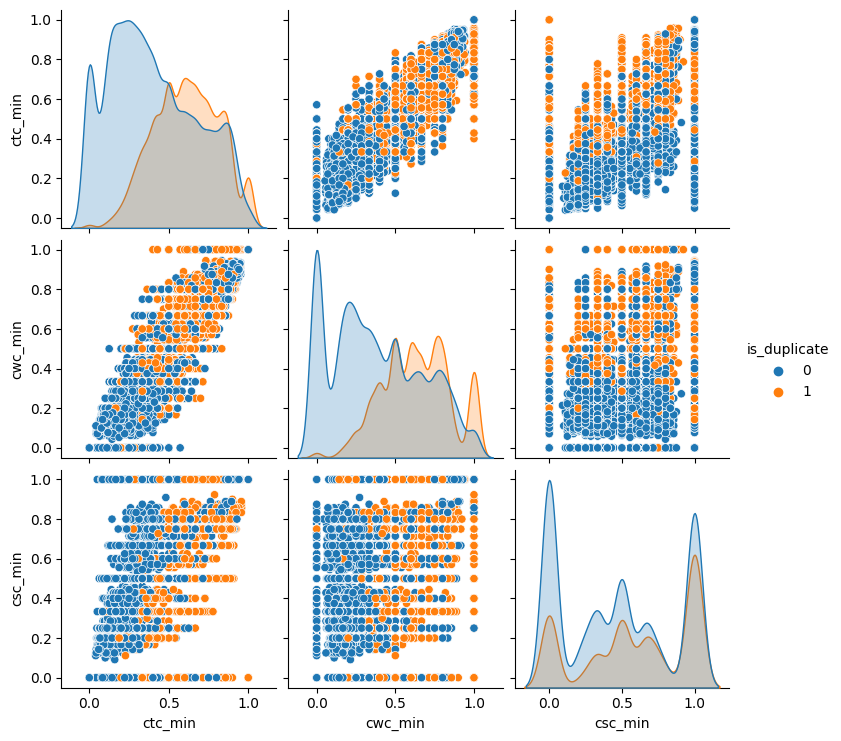

In [55]:
sns.pairplot(small_dataset[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

2. Maximum Variable with Target Variable

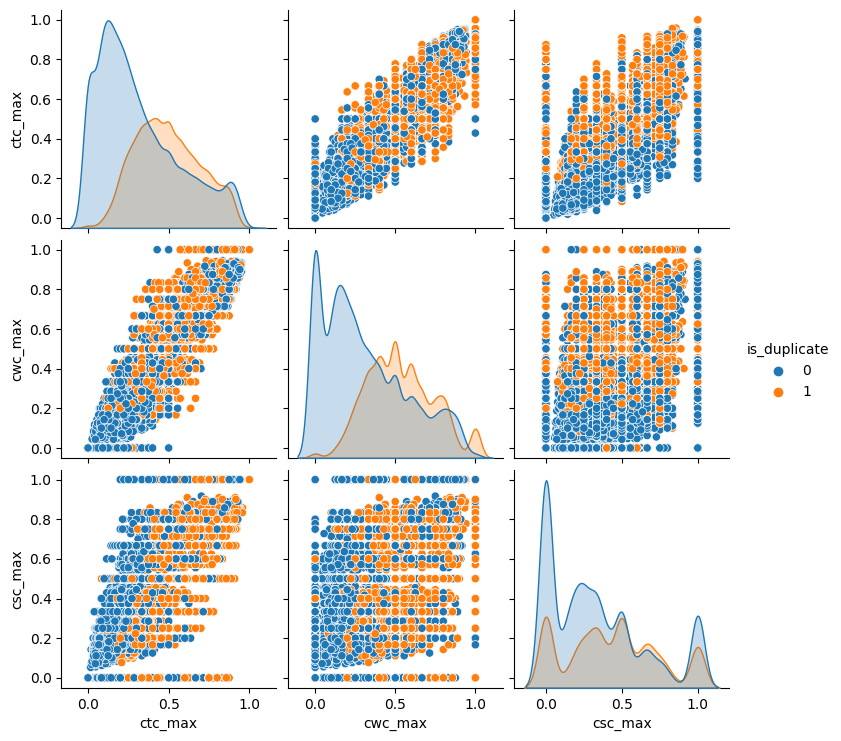

In [56]:
sns.pairplot(small_dataset[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

3.  Last Word and First Word Analysis - We plot the first and last word match against the target variable.

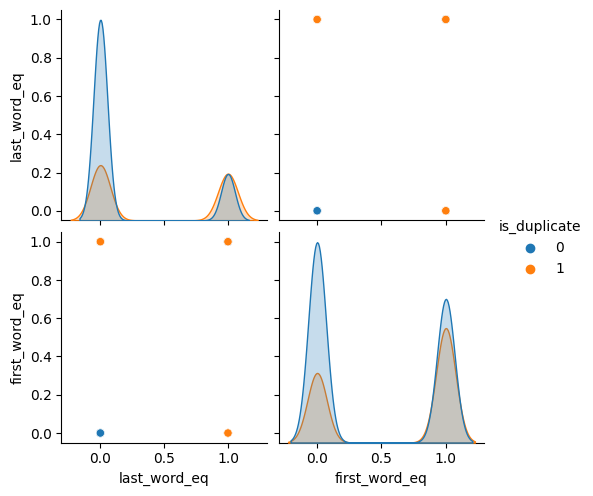

In [57]:
sns.pairplot(small_dataset[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

**Conclusion**
We can see that if the last word does not match, there is a good chance that the question has not been copied. Similarly, if the first word is not equal, the likelihood of non-duplicate is high.

4. Length-based Feature Analysis-

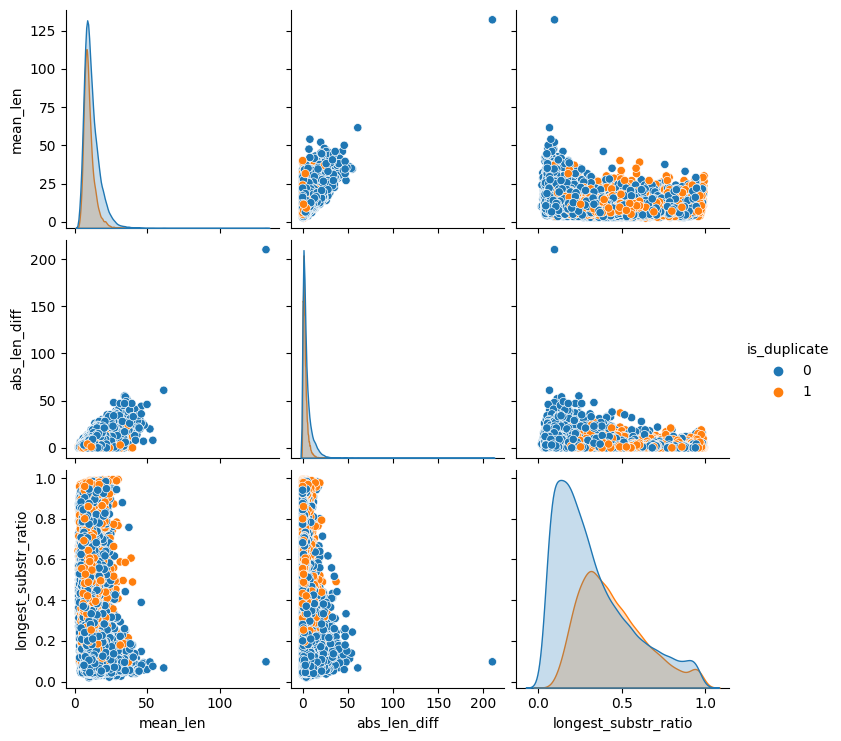

In [58]:
sns.pairplot(small_dataset[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

 5. Fuzzy Feature Analysis

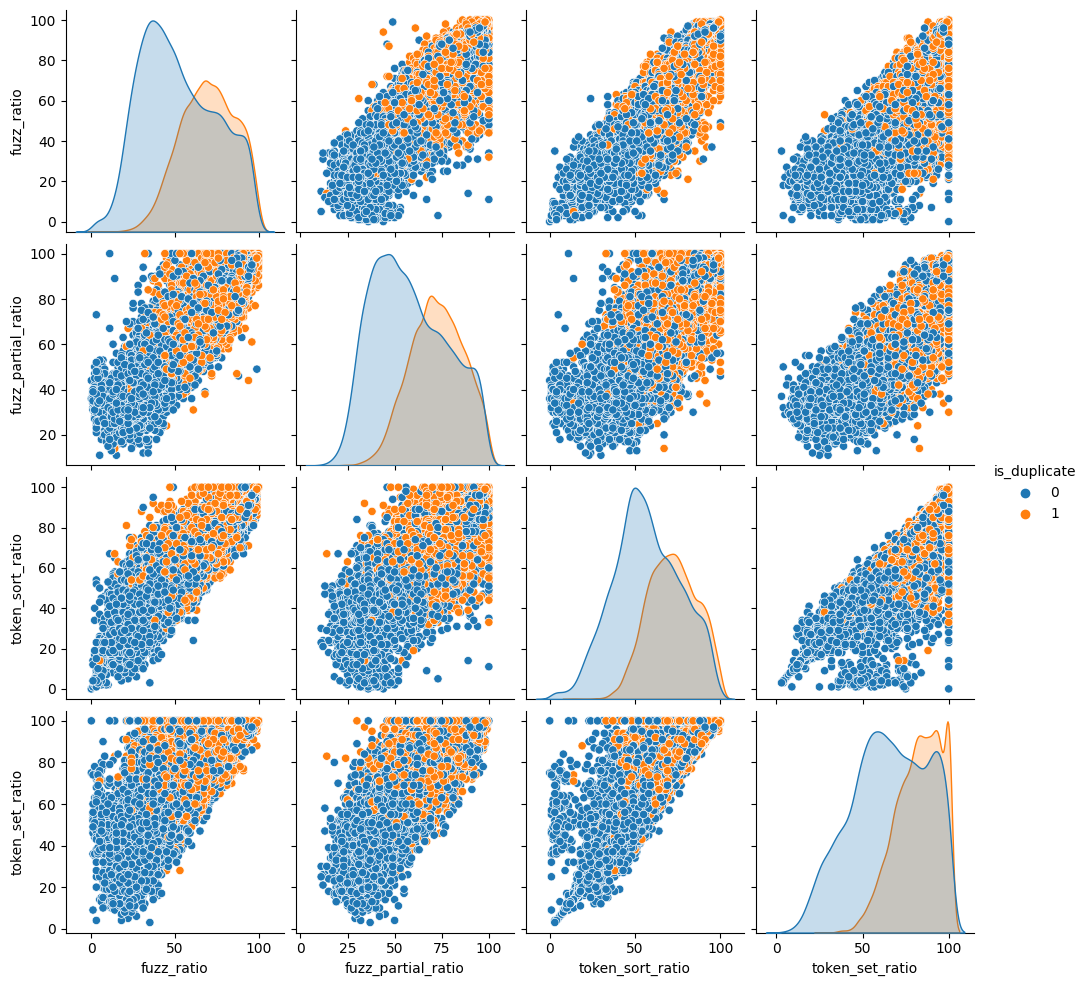

In [59]:
sns.pairplot(small_dataset[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

**Dimensionality Reduction**

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.065s...
[t-SNE] Computed neighbors for 30000 samples in 8.422s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

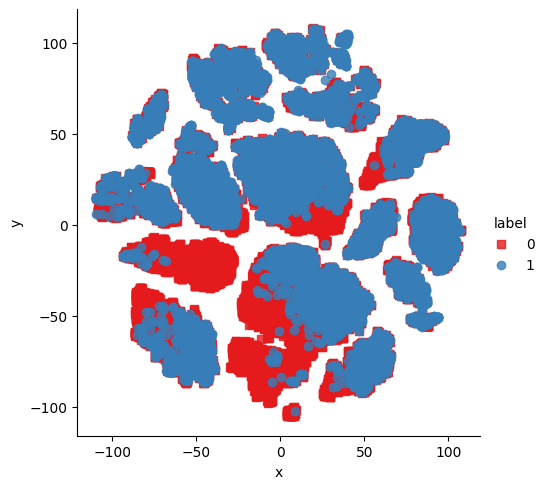

In [64]:
# Using TSNE for Dimensionality reduction for 15 Features
# (Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(small_dataset[['cwc_min', 'cwc_max', 'csc_min',
    'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' ,
    'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,
    'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = small_dataset['is_duplicate'].values

#train
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

#visualize
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['s','o'])

In [65]:
small_dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,...,0.363633,0,1,3,9.5,0.302326,39,45,67,85
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,...,0.045454,0,0,11,16.5,0.094340,26,49,35,37
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,...,0.833330,1,1,0,24.0,0.584000,100,99,100,99
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,...,0.499995,0,1,2,9.0,0.347826,74,73,74,89
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,...,0.272725,0,0,3,9.5,0.325000,75,79,73,79


**Below This can be deleted**

In [66]:
question_dataset=small_dataset[['question1','question2']]
question_dataset.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [67]:
new_feature_dataset=small_dataset.drop(columns=['id','qid1','qid2','question1','question2'])
new_feature_dataset.head()

,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len,word_common,Total_unique_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,1,58,42,11,8,4,19,0.21,0.499992,0.428565,...,0.363633,0,1,3,9.5,0.302326,39,45,67,85
289521,0,52,105,11,22,2,32,0.06,0.000000,0.000000,...,0.045454,0,0,11,16.5,0.094340,26,49,35,37
4665,0,125,124,24,24,20,42,0.48,0.944439,0.944439,...,0.833330,1,1,0,24.0,0.584000,100,99,100,99
54203,1,45,60,8,10,5,18,0.28,0.599988,0.499992,...,0.499995,0,1,2,9.0,0.347826,74,73,74,89
132566,0,54,39,11,8,3,19,0.16,0.399992,0.333328,...,0.272725,0,0,3,9.5,0.325000,75,79,73,79


In [68]:
question_list=list(question_dataset['question1'])+list(question_dataset['question2'])

# Apply Bag of Word Model
cv=CountVectorizer(max_features = 3000)
cv_fit=cv.fit_transform(question_list)
#print(cv_fit.shape)

q1_arr, q2_arr = np.vsplit(cv.fit_transform(question_list).toarray(),2)
#print(q1_arr.shape)
#Create dataFrame for both the questions Feature
temp_df1 = pd.DataFrame(q1_arr, index= question_dataset.index)
temp_df2 = pd.DataFrame(q2_arr, index= question_dataset.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
print(temp_df.shape)

#Concat vectorize dataframe with our newly added feature Df
final_df = pd.concat([new_feature_dataset, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6000)
(30000, 6023)


,is_duplicate,question1_len,question2_len,question1_word_len,question2_word_len,word_common,Total_unique_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0.499992,0.428565,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0.944439,0.944439,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0.599988,0.499992,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values,test_size=0.2,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 6022)
(24000,)
(6000, 6022)
(6000,)


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7986666666666666

In [73]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xg = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7986666666666666

**Conclusion**

Accuracy score has increased to 0.798 after applying advanced feature engineering

In [74]:
from sklearn.metrics import confusion_matrix
# for random forest model
confusion_matrix(y_test,y_pred_rf)

array([[3203,  624],
       [ 630, 1543]])

In [75]:
# for xgboost model
confusion_matrix(y_test,y_pred_xg)

array([[3190,  637],
       [ 571, 1602]])